# Notation 
notation:
 * **24C5** = convolution layer with 24 feature maps using a 5x5 filter and stride 1
 * **24C5S2** = convolution layer with 24 feature maps using a 5x5 filter and stride 2 
 * **P2** = max pooling using 2x2 filter and stride 2
 * **256** = fully connected dense layer with 256 units 
 

   

# **MNIST WAY**

In [9]:
!pip install python-mnist

In [10]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import LearningRateScheduler
# import matplotlib.pyplot as plt

# # # from fg import freeze_graph

# import numpy as np
# from mnist import MNIST

# mndata = MNIST('/kaggle/input/emnist/emnist_source_files/')
# # #This will load the train and test data
# X_train, y_train = mndata.load('/kaggle/input/emnist/emnist_source_files/emnist-balanced-train-images-idx3-ubyte',
#                                '/kaggle/input/emnist/emnist_source_files/emnist-balanced-train-labels-idx1-ubyte')
# X_test, y_test = mndata.load('/kaggle/input/emnist/emnist_source_files/emnist-balanced-test-images-idx3-ubyte',
#                              '/kaggle/input/emnist/emnist_source_files/emnist-balanced-test-labels-idx1-ubyte')
# # # Convert data to numpy arrays and normalize images to the interval [0, 1]
# X_train = np.array(X_train) / 255.0
# y_train = np.array(y_train)
# X_test = np.array(X_test) / 255.0
# y_test = np.array(y_test)

# X_train = X_train.reshape(X_train.shape[0], 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 28, 28)

# # #for train data
# for t in range(60000):
#     X_train[t]=np.transpose(X_train[t])
    
# # #checking
# # plt.imshow(X_train[0])
# # plt.show

# # #for test data  
# for t in range(10000):
#     X_test[t]=np.transpose(X_test[t])
    
# X_train = X_train.reshape(X_train.shape[0],28,28, 1)
# X_test = X_test.reshape(X_test.shape[0],28,28, 1)

# from keras.models import Sequential
# from keras import optimizers
# from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM, BatchNormalization
# from keras import backend as K
# from keras.constraints import maxnorm
# # def resh(ipar):
# #     opar = []
# #     for image in ipar:
# #         opar.append(image.reshape(-1))
# #     return np.asarray(opar)

# from keras.utils import np_utils


# train_images = X_train.astype('float32')
# test_images = X_test.astype('float32')

# # train_images = resh(train_images)
# # test_images = resh(test_images)

# number_of_classes = 47

# y1 = np_utils.to_categorical(y_train-1, number_of_classes)
# y2 = np_utils.to_categorical(y_test-1, number_of_classes)

# # GLOBAL VARIABLES
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
# styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

# **CSV WAY**

In [11]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# LOAD THE DATA
training_letter = pd.read_csv("../input/emnist/emnist-balanced-train.csv")
testing_letter = pd.read_csv("../input/emnist/emnist-balanced-test.csv")



# #training_labels
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
# #testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)

train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

number_of_classes = 47

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

# 1. How many convolution-subsambling pairs?
how many pairs of convolution-subsampling?
 * 784 - **[24C5-P2]** - 256 - 10
 * 784 - **[24C5-P2] - [48C5-P2]** - 256 - 10
 * 784 - **[24C5-P2] - [48C5-P2] - [64C5-P2]** - 256 - 10
   

Over than 3 the pixel got too small

In [12]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(47, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN (C-P)x1: Epochs=20, Train accuracy=0.97891, Validation accuracy=0.86724
CNN (C-P)x2: Epochs=20, Train accuracy=0.98106, Validation accuracy=0.87859
CNN (C-P)x3: Epochs=20, Train accuracy=0.97698, Validation accuracy=0.88156


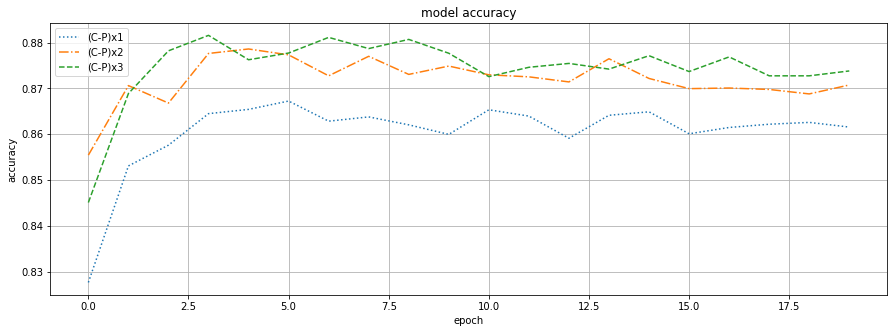

In [14]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.90,1])
plt.grid()
plt.show()

for efficiency, 2 is the best

# 2. How many feature maps?
How many feature maps ?
 * 784 - [**8**C5-P2] - [**16**C5-P2] - 256 - 10
 * 784 - [**16**C5-P2] - [**32**C5-P2] - 256 - 10
 * 784 - [**24**C5-P2] - [**48**C5-P2] - 256 - 10
 * 784 - [**32**C5-P2] - [**64**C5-P2] - 256 - 10
 * 784 - [**48**C5-P2] - [**96**C5-P2] - 256 - 10
 * 784 - [**64**C5-P2] - [**128**C5-P2] - 256 - 10

# Experiment 2

In [15]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(47, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.93473, Validation accuracy=0.86955
CNN 16 maps: Epochs=20, Train accuracy=0.96161, Validation accuracy=0.87527
CNN 24 maps: Epochs=20, Train accuracy=0.97017, Validation accuracy=0.87753
CNN 32 maps: Epochs=20, Train accuracy=0.97346, Validation accuracy=0.87863
CNN 48 maps: Epochs=20, Train accuracy=0.97851, Validation accuracy=0.87819
CNN 64 maps: Epochs=20, Train accuracy=0.97872, Validation accuracy=0.87673


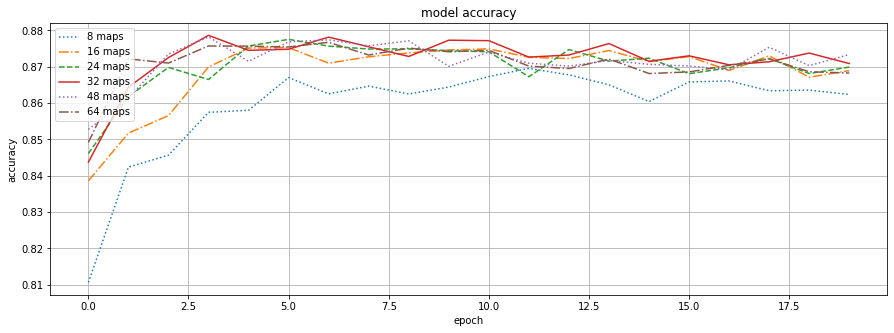

In [17]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.90,1])
plt.grid()
plt.show()

## Summary
32 maps in the first convolutional layer and 64 maps in the second convolutional layer is the best. 

# 3. How large a dense layer?
How many dense units ?
 * 784 - [32C5-P2] - [64C5-P2] - **0** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **32** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **64** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **128** -10
 * 784 - [32C5-P2] - [64C5-P2] - **256** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **512** -10
 * 784 - [32C5-P2] - [64C5-P2] - **1024** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **2048** - 10

# Experiment 3

In [18]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(47, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=20, Train accuracy=0.94855, Validation accuracy=0.87881
CNN 32N: Epochs=20, Train accuracy=0.92372, Validation accuracy=0.87589
CNN 64N: Epochs=20, Train accuracy=0.94349, Validation accuracy=0.87983
CNN 128N: Epochs=20, Train accuracy=0.96137, Validation accuracy=0.88298
CNN 256N: Epochs=20, Train accuracy=0.97493, Validation accuracy=0.88240
CNN 512N: Epochs=20, Train accuracy=0.98248, Validation accuracy=0.88214
CNN 1024N: Epochs=20, Train accuracy=0.98737, Validation accuracy=0.88147
CNN 2048N: Epochs=20, Train accuracy=0.99207, Validation accuracy=0.87921


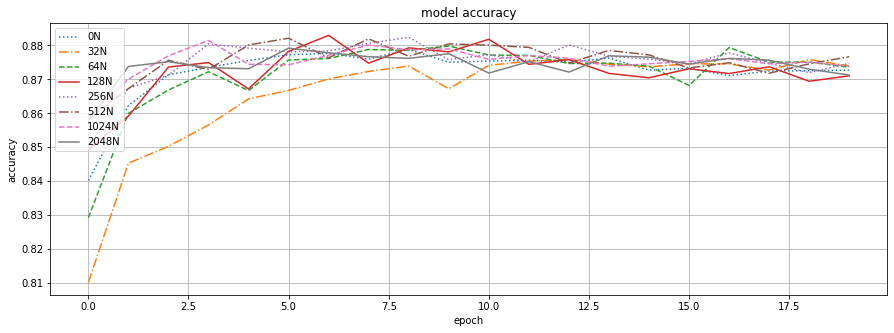

In [20]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.grid()
plt.show()

## Summary
256 units is the best.

# 4. How much dropout?
Dropout prevent network from overfitting. How much dropout ?
 * 0%, 10%, 20%, 30%, 40%, 50%, 60%, or 70%

# Experiment 4

In [21]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS PAKE 20148 DENSE
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(47, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=30, Train accuracy=0.98808, Validation accuracy=0.87903
CNN D=0.1: Epochs=30, Train accuracy=0.95347, Validation accuracy=0.88728
CNN D=0.2: Epochs=30, Train accuracy=0.92800, Validation accuracy=0.89224
CNN D=0.3: Epochs=30, Train accuracy=0.90571, Validation accuracy=0.89685
CNN D=0.4: Epochs=30, Train accuracy=0.88704, Validation accuracy=0.89592
CNN D=0.5: Epochs=30, Train accuracy=0.86535, Validation accuracy=0.89043
CNN D=0.6: Epochs=30, Train accuracy=0.83811, Validation accuracy=0.88231
CNN D=0.7: Epochs=30, Train accuracy=0.78588, Validation accuracy=0.86613


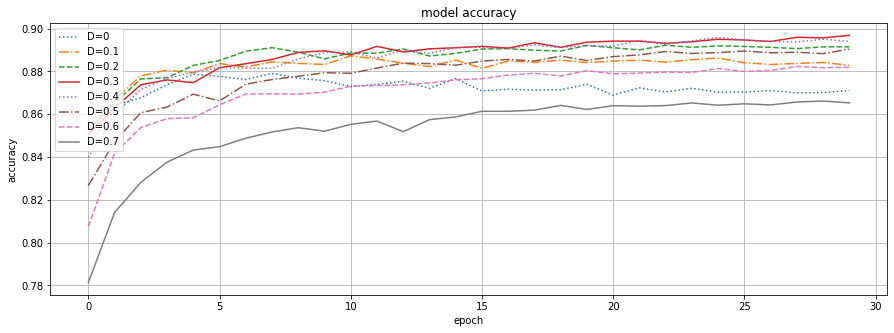

In [23]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.grid()
plt.show()

## Summary
40% dropout is the best.

# 5. Advanced features

 * replace '32C5' with '32C3-32C3'  
 * replace 'P2' with '32C5S2'
 * add batch normalization
 * add data augmentation

In [24]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

j=0
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.5))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(47, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(47, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(47, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(47, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
j=4
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(47, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS 1,2,3,4
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN","both+BN+DA"]
epochs = 35
for j in range(nets-1):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
    
# CREATE MORE TRAINING IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# TRAIN NETWORK 5
j = nets-1
history[j] = model[j].fit_generator(datagen.flow(train_x,train_y, batch_size=64), 
    epochs = epochs, steps_per_epoch = train_x.shape[0]//64,
    validation_data = (test_x,test_y), callbacks=[annealer], verbose=0)
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN basic: Epochs=35, Train accuracy=0.88432, Validation accuracy=0.89113
CNN 32C3-32C3: Epochs=35, Train accuracy=0.90319, Validation accuracy=0.89894
CNN 32C5S2: Epochs=35, Train accuracy=0.91468, Validation accuracy=0.89592
CNN both+BN: Epochs=35, Train accuracy=0.92164, Validation accuracy=0.89942


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


CNN both+BN+DA: Epochs=35, Train accuracy=0.89458, Validation accuracy=0.89730


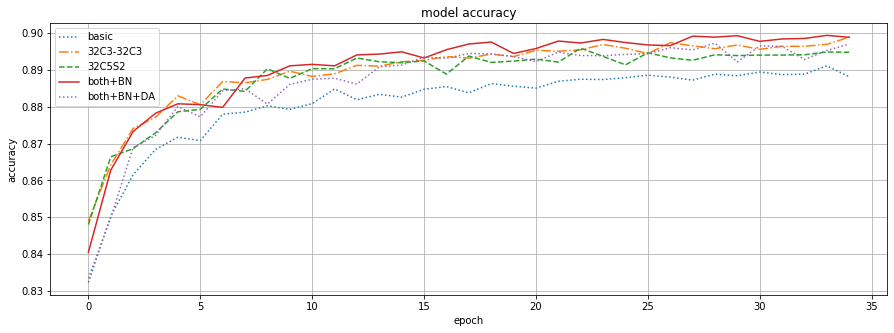

In [27]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.grid()
plt.show()

# Conclusion

 *  **784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 256 - 26** 
 * with 40% dropout, batch normalization, and data augmentation added

